# 24 Jan
## EDA Lab

## import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

## Loading the dataset

In [4]:
df = pd.read_csv('automobile.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Data cleaning

- ### cleaning the price feild

In [7]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

price
True     201
False      4
Name: count, dtype: int64

In [8]:
df['price'].loc[df['price'].str.isnumeric()== False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [9]:
## setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

- ### cleaning the horsepower feild

In [11]:
df['horsepower'].str.isnumeric().value_counts()

horsepower
True     203
False      2
Name: count, dtype: int64

In [12]:
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int32

- ### Cleaning normalized losses feild

In [17]:
df['normalized-losses'].str.isnumeric().value_counts()

normalized-losses
True     164
False     41
Name: count, dtype: int64

In [18]:
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nlmean = nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nlmean).astype(int)
df['normalized-losses']

0      122
1      122
2      122
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [20]:
#calculate mean, median and mode of dat set height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.72487804878049 54.1 0    50.8
Name: height, dtype: float64


# Visualization

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


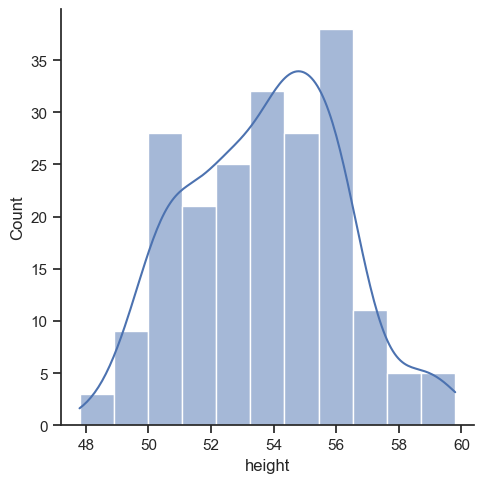

In [69]:
sns.displot(df['height'],kde=True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Batch1\AppData\Local\Temp\ipykernel_13772\1917941635.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


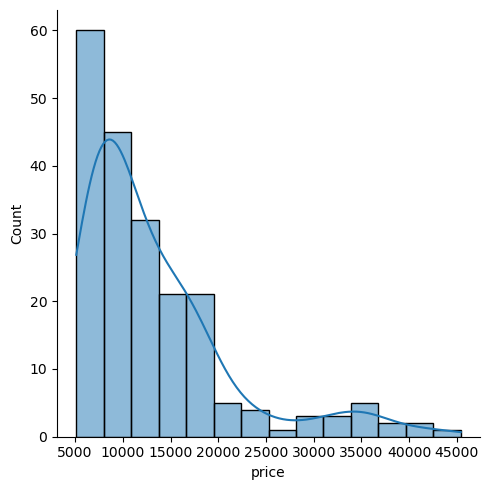

In [49]:
sns.displot(df['price'],kde=True)
plt.tight_layout()
plt.show()

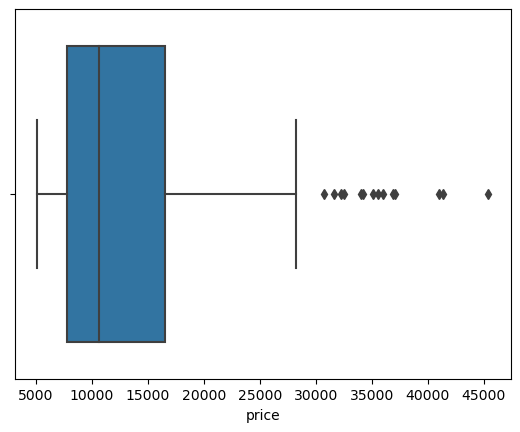

In [50]:
#boxplot for price of cars
sns.boxplot(x="price",data=df)
plt.show()

## Bivariate analysis

Text(0, 0.5, 'horsepower')

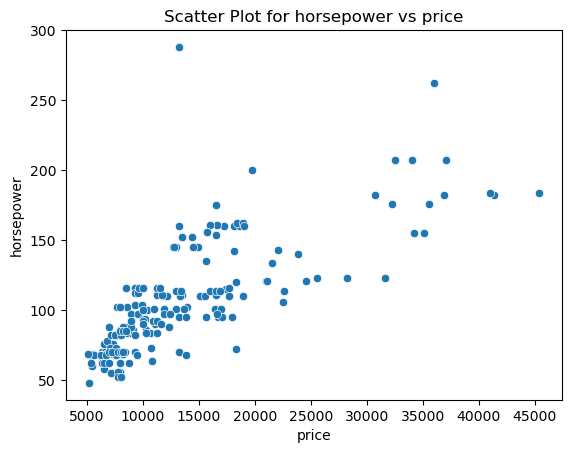

In [60]:
# plot the relationship between “horsepower” and ”price”
sns.scatterplot(x = df["price"],y = df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("price")
plt.ylabel("horsepower")

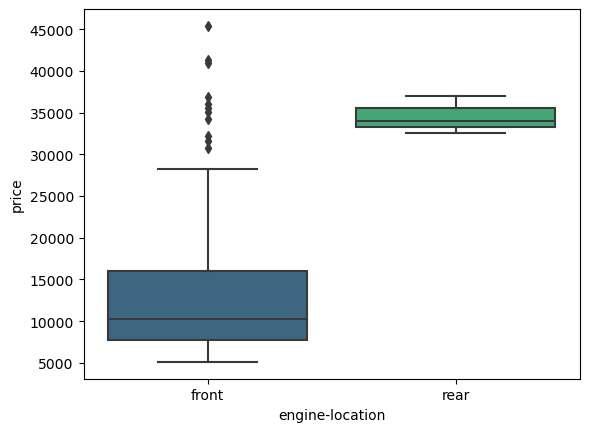

In [55]:
#boxplot
sns.boxplot(x="engine-location",y="price",data=df,palette='viridis')
plt.show()

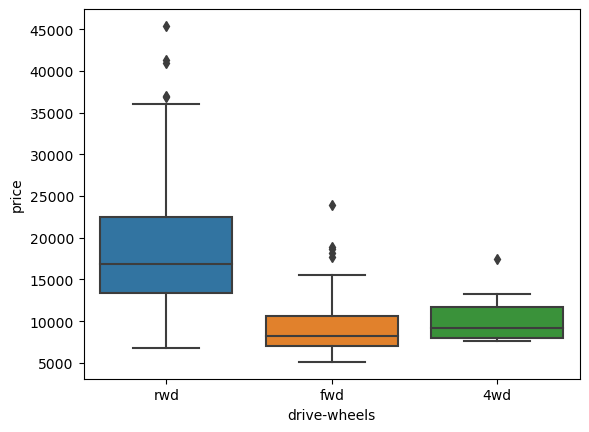

In [61]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)
plt.show()

## Multivariate analysis

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


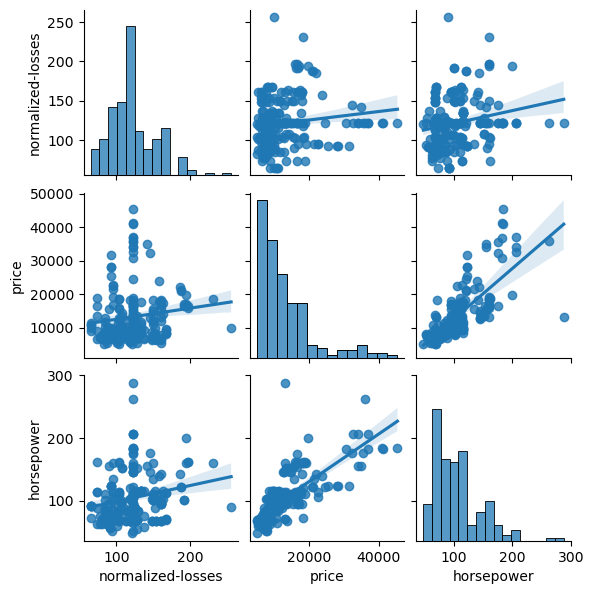

In [63]:
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['normalized-losses', 'price','horsepower'],  kind="reg")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


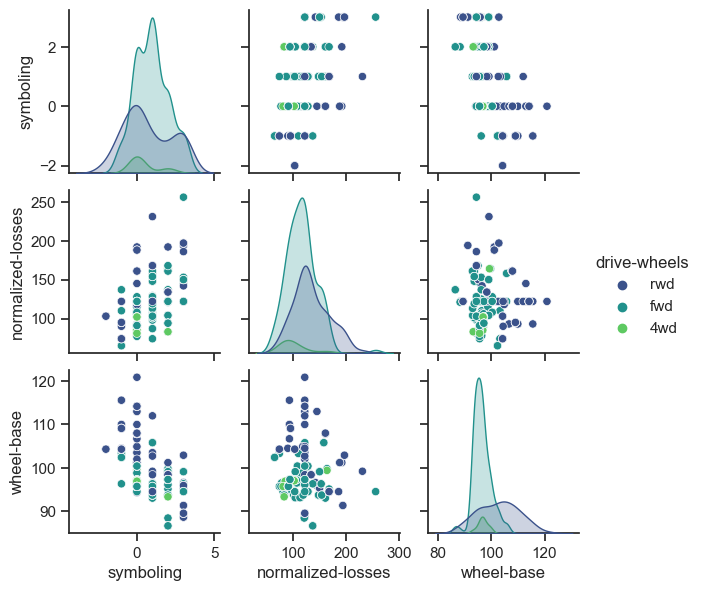

In [66]:
 #pair plot (matrix scatterplot) of few columns 
#sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels",palette='viridis')
plt.show()

In [67]:
from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.591033244659585e-39
cor:		 0.7579456217935241


Here the correlation of these two variable is 0.80957 which is close to +1 thus we can make sure that price and horsepower are highly positively correlated. Using pandas corr() function correlation between entire numerical record can be calculated.

In [71]:
correlation = df.corr(method='pearson',numeric_only=True)
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.114525,0.203434,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.203434,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


<Axes: >

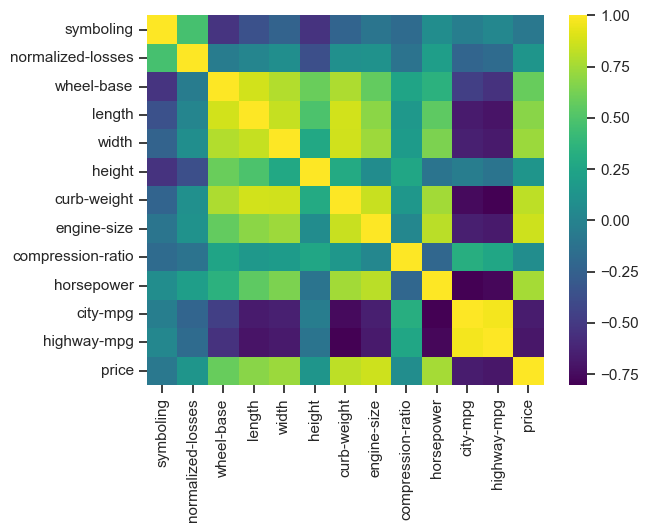

In [75]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns,cmap='viridis')
          

# mtcars dataset

## loading the dataset

In [78]:
df1 = pd.read_csv('mtcars.csv')
df1

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## checking for null values

In [82]:
df1.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

## checking for duplicates values

In [85]:
df1.duplicated().sum()

0

In [91]:
gear = df1['gear'].value_counts()

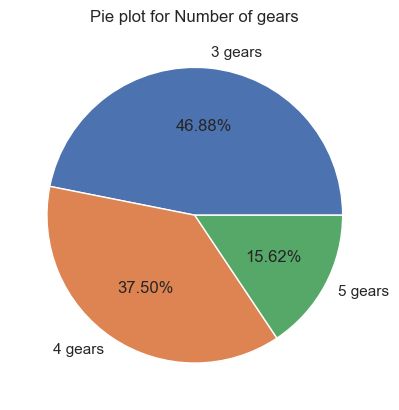

In [120]:
plt.pie(gear,labels=['3 gears','4 gears','5 gears'],autopct='%.2f%%')
plt.title("Pie plot for Number of gears")
plt.show()

In [93]:
gear 

gear
3    15
4    12
5     5
Name: count, dtype: int64

Text(0, 0.5, 'mpg')

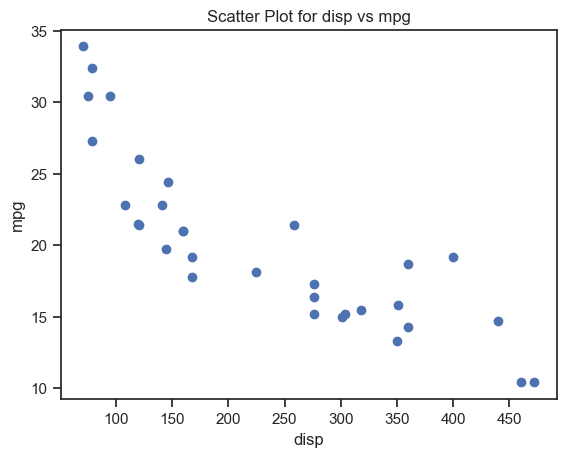

In [121]:

plt.scatter(df1["disp"], df1["mpg"])
plt.title("Scatter Plot for disp vs mpg")
plt.xlabel("disp")
plt.ylabel("mpg")

- as the displacemnt of the car increases the mileage decreases

In [142]:
df1.groupby(['gear','cyl'])['mpg'].agg([np.sum, np.mean])

sum    mean
gear cyl               
3    4     21.5  21.500
     6     39.5  19.750
     8    180.6  15.050
4    4    215.4  26.925
     6     79.0  19.750
5    4     56.4  28.200
     6     19.7  19.700
     8     30.8  15.400

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


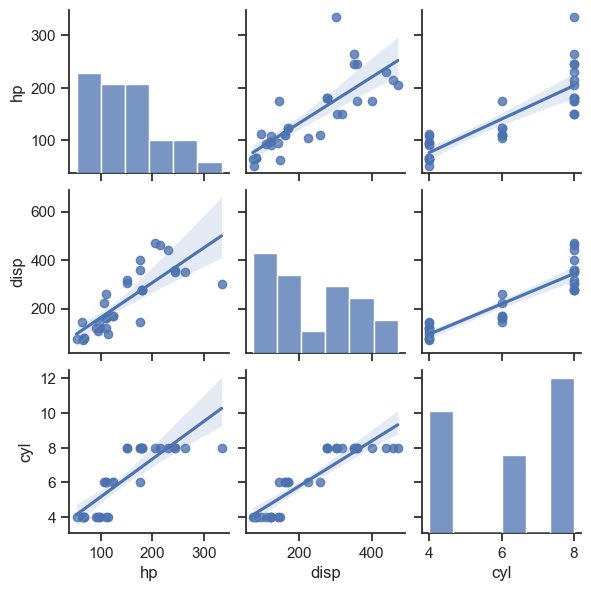

In [105]:
# pair plot with plot type regression
sns.pairplot(df1,height=2, vars = ['hp', 'disp','cyl'],  kind="reg")
plt.show()

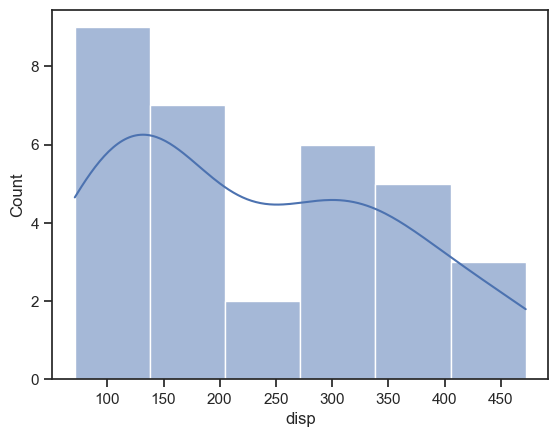

In [111]:
sns.histplot(df1['disp'],kde=True)
plt.show()

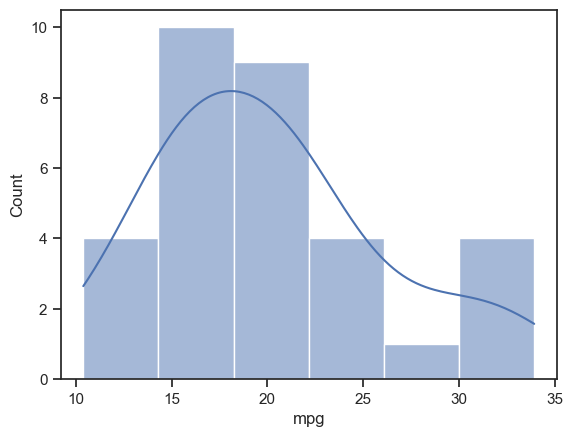

In [118]:
sns.histplot(df1['mpg'],kde=True)
plt.show()

- most cars have mpg in the range 13-23

In [112]:
correlation = df1.corr(method='pearson',numeric_only=True)
correlation

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


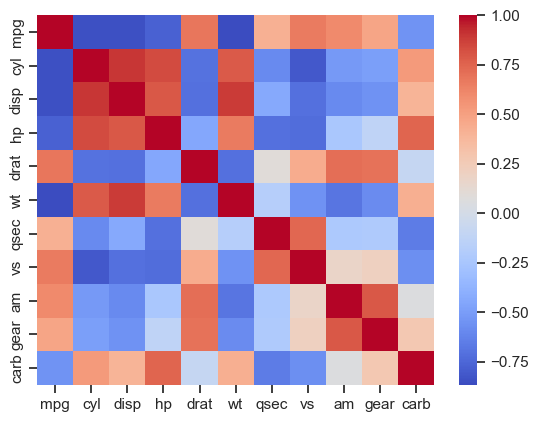

In [114]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns,cmap='coolwarm')
plt.show()